In [1]:
import numpy as np
import matplotlib.pyplot as plt

from copy import copy
from numpy.random import rand
from numpy import sqrt

In [2]:
class Particle:
    def __init__(self, Position=[], Cost=[], Velocity=[]):
        self.Position = Position
        self.Cost = Cost
        self.Velocity = Velocity
        self.Best = Particle

In [3]:
global VarSize
VarSize = 10

In [4]:
problem = dict(
    CostFunction = lambda x : sum([i**2 for i in x]),
    nVar = 5,
    VarMin = -10,
    VarMax = 10,
)

params = dict(
    MaxIt = 100,
    nPop = 50,
    w = 1,
    wdamp = 0.99,
    c1 = 2,
    c2 = 2,
    ShowIterInfo = True
)

# Constriction Coefficient
kappa = 1
phi1 = 2.05
phi2 = 2.05
phi = phi1 + phi2
chi = 2*kappa / abs(2 - phi - sqrt(phi**2 - 4*phi))


params2 = dict(
    MaxIt = 100,
    nPop = 50,
    w = chi,
    wdamp = 0.99,
    c1 = chi*phi1,
    c2 = chi*phi2,
    ShowIterInfo = True
)

In [5]:
def PSO(problem, params):
    # Get Problems
    CostFunction, nVar, VarMin, VarMax = problem.values()

    # Get Params
    MaxIt, nPop, w, wdamp, c1, c2, ShowIterInfo = params.values()

    # Initialization
    particle = [Particle() for i in range(nPop)]
    GlobalBest = Particle(Cost=float('inf'))
    for i in range(nPop):
        particle[i].Position = np.random.uniform(VarMin, VarMax, VarSize)
        particle[i].Cost = CostFunction(particle[i].Position)
        particle[i].Velocity = np.zeros(VarSize)

        particle[i].Best.Position = particle[i].Position
        particle[i].Best.Cost = particle[i].Cost

        if particle[i].Cost < GlobalBest.Cost:
            GlobalBest = copy(particle[i])

    BestCosts = np.zeros( (MaxIt, 1) )

    # Main loop of PSO
    for it in range(MaxIt):
        for i in range(nPop):
            particle[i].Velocity = w*particle[i].Velocity \
                                    +c1*rand(VarSize)*(particle[i].Best.Position - particle[i].Position) \
                                    +c2*rand(VarSize)*(GlobalBest.Position - particle[i].Position)
            particle[i].Position = particle[i].Position + particle[i].Velocity
            particle[i].Cost = CostFunction(particle[i].Position)

            if particle[i].Cost < particle[i].Best.Cost:
                particle[i].Best = copy(particle[i])
                if particle[i].Best.Cost < GlobalBest.Cost:
                    GlobalBest = copy(particle[i].Best)

        BestCosts[it] = GlobalBest.Cost

        if ShowIterInfo:
            print(f"Iteration {it} : Best Cost = {BestCosts[it]}")

        w = w * wdamp

    out = dict(
        pop = particle,
        BestSol = GlobalBest,
        BestCosts = BestCosts
    )

    return out


In [6]:
out_1 = PSO(problem, params)
BestCosts_1 = out_1['BestCosts']

Iteration 0 : Best Cost = [122.08853962]
Iteration 1 : Best Cost = [122.08853962]
Iteration 2 : Best Cost = [122.08853962]
Iteration 3 : Best Cost = [122.08853962]
Iteration 4 : Best Cost = [122.08853962]
Iteration 5 : Best Cost = [103.52977397]
Iteration 6 : Best Cost = [103.52977397]
Iteration 7 : Best Cost = [103.52977397]
Iteration 8 : Best Cost = [103.52977397]
Iteration 9 : Best Cost = [103.52977397]
Iteration 10 : Best Cost = [103.52977397]
Iteration 11 : Best Cost = [103.52977397]
Iteration 12 : Best Cost = [103.52977397]
Iteration 13 : Best Cost = [103.52977397]
Iteration 14 : Best Cost = [103.52977397]
Iteration 15 : Best Cost = [103.52977397]
Iteration 16 : Best Cost = [103.52977397]
Iteration 17 : Best Cost = [103.52977397]
Iteration 18 : Best Cost = [103.52977397]
Iteration 19 : Best Cost = [103.52977397]
Iteration 20 : Best Cost = [103.52977397]
Iteration 21 : Best Cost = [103.52977397]
Iteration 22 : Best Cost = [103.52977397]
Iteration 23 : Best Cost = [103.52977397]
It

In [7]:
out_2 = PSO(problem, params2)
BestCosts_2 = out_2['BestCosts']

Iteration 0 : Best Cost = [150.35944929]
Iteration 1 : Best Cost = [150.35944929]
Iteration 2 : Best Cost = [93.71810002]
Iteration 3 : Best Cost = [93.71810002]
Iteration 4 : Best Cost = [93.71810002]
Iteration 5 : Best Cost = [87.06487741]
Iteration 6 : Best Cost = [87.06487741]
Iteration 7 : Best Cost = [79.37232657]
Iteration 8 : Best Cost = [38.32804165]
Iteration 9 : Best Cost = [38.32804165]
Iteration 10 : Best Cost = [38.32804165]
Iteration 11 : Best Cost = [23.79741247]
Iteration 12 : Best Cost = [23.40685339]
Iteration 13 : Best Cost = [13.07014929]
Iteration 14 : Best Cost = [7.7879052]
Iteration 15 : Best Cost = [7.7879052]
Iteration 16 : Best Cost = [7.7879052]
Iteration 17 : Best Cost = [7.7879052]
Iteration 18 : Best Cost = [3.45927907]
Iteration 19 : Best Cost = [2.82178564]
Iteration 20 : Best Cost = [1.94149774]
Iteration 21 : Best Cost = [1.27838233]
Iteration 22 : Best Cost = [1.18942487]
Iteration 23 : Best Cost = [1.00195437]
Iteration 24 : Best Cost = [1.00195437

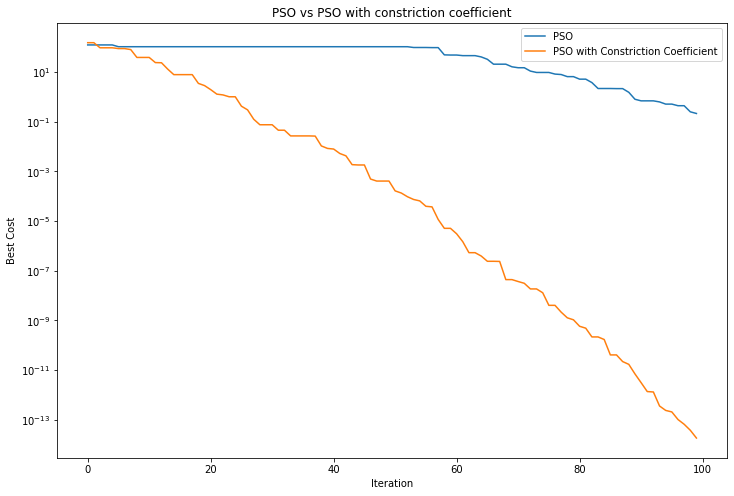

In [8]:
plt.figure(figsize=(12, 8))

plt.semilogy(BestCosts_1)
plt.xlabel('Iteration')
plt.ylabel('Best Cost');

plt.semilogy(BestCosts_2)
plt.xlabel('Iteration')
plt.ylabel('Best Cost')

plt.legend(["PSO", "PSO with Constriction Coefficient"])
plt.title("PSO vs PSO with constriction coefficient");